b = 0.32394307848370435, w = 1.4731251028849779
Error: 112.47667627628394


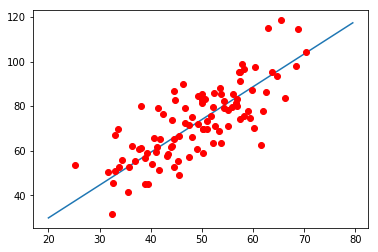

In [18]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt


points = genfromtxt("data.csv", delimiter=",")

# y = b + wx


def calculate_loss_value(b, w):
    loss = 0
    for point in points:
        x, y = point
        loss += (y - (b + w * x)) ** 2
    return loss / float(len(points))


def gradient_descent_algorithm(b, w):
    learning_rate = 0.0001
    N = float(len(points))
    derive_b, derive_w = [0.0, 0.0]
    for point in points:
        x, y = point
        derive_b += ((b + w * x) - y) / N
        derive_w += ((b + w * x) - y) * x / N
    gradient_b = b - learning_rate * derive_b
    gradient_w = w - learning_rate * derive_w
    return [gradient_b, gradient_w]


def start_gradient_descent():
    num_iterations = 10000
    b, w = [0, 0]
    for _ in range(num_iterations):
        b, w = gradient_descent_algorithm(b, w)
    return [b, w]


def run():
    [result_b, result_w] = start_gradient_descent()
    error = calculate_loss_value(result_b, result_w)
    print("b = {0}, w = {1}".format(result_b, result_w))
    print("Error: {0}".format(error))
    plot_x = np.arange(20., 80., 0.5)
    plot_y = [result_b + result_w * x for x in plot_x]
    plt.plot(plot_x, plot_y)

    train_x = [p[0] for p in points]
    train_y = [p[1] for p in points]
    plt.plot(train_x, train_y, 'ro')
    plt.show()


if __name__ == '__main__':
    run()
